In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils import class_weight
import numpy as np


In [ ]:
from google.colab import files
files.upload()  # ارفع ملف kaggle.json هنا


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"boushra","key":"9a9db132b759fb61a6bab75e3770d3d9"}'}

In [ ]:
# إنشاء مجلد مخفي
!mkdir -p ~/.kaggle

# نقل الملف المرفوع
!cp kaggle.json ~/.kaggle/

# إعطاء صلاحيات
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d debasisdotcom/parkinson-disease-detection
### للحصول على اسم الداتا سيت من الرابط الاعلى بعد كلمه
#dataset
#ننسخ كل الاسم ماعدا
#/data
#بعد كذا نلصقه بعد d


Dataset URL: https://www.kaggle.com/datasets/debasisdotcom/parkinson-disease-detection
License(s): other
  0% 0.00/14.8k [00:00<?, ?B/s]
100% 14.8k/14.8k [00:00<00:00, 71.7MB/s]


In [ ]:
!unzip parkinson-disease-detection.zip


Archive:  parkinson-disease-detection.zip
  inflating: Parkinsson disease.csv  


In [ ]:
path='/content/Parkinsson disease.csv'

In [ ]:
import pandas as pd

df = pd.read_csv(path)
display(df.head())

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print(df.dtypes) #print type

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object


In [ ]:
print(df.isnull().sum()) #check the

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64


In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# distribution of target Variable
df['status'].value_counts()

,count
status,
1,147
0,48


In [ ]:
#grouping by target

df.groupby('status').mean(numeric_only=True)


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


#sperate feature and target

In [ ]:
X = df.drop(columns=['name','status'], axis=1)
Y = df['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split #split data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

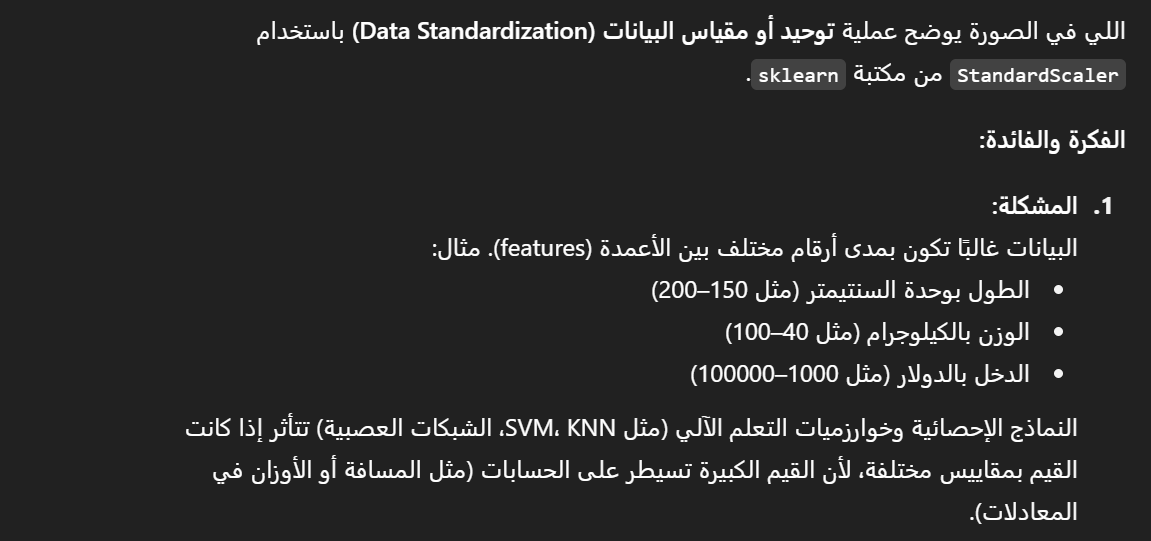


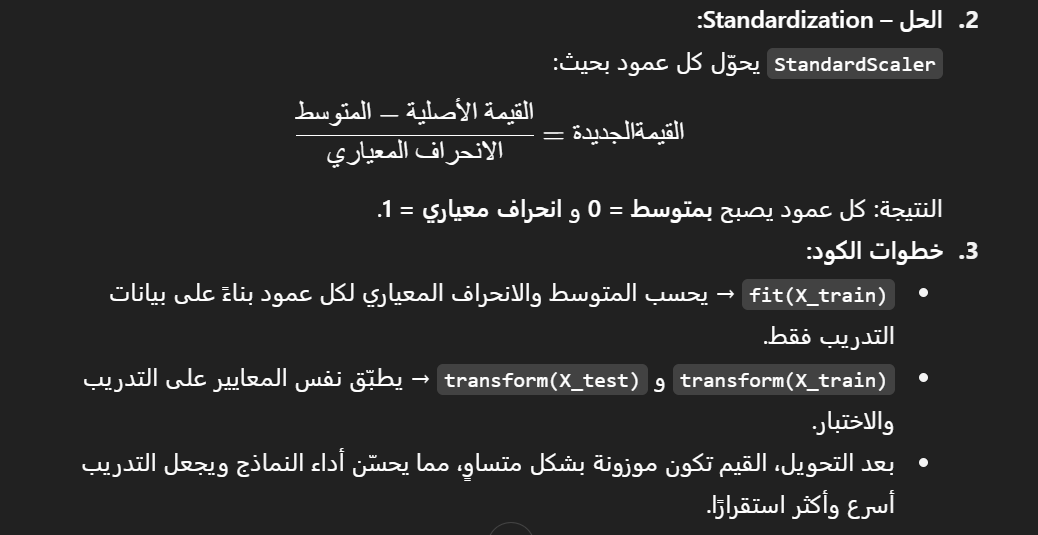

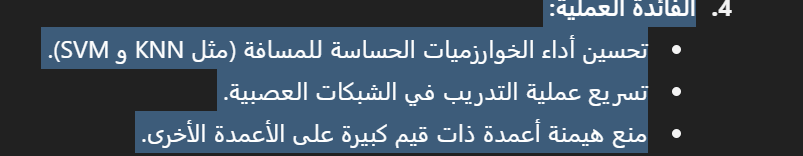

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


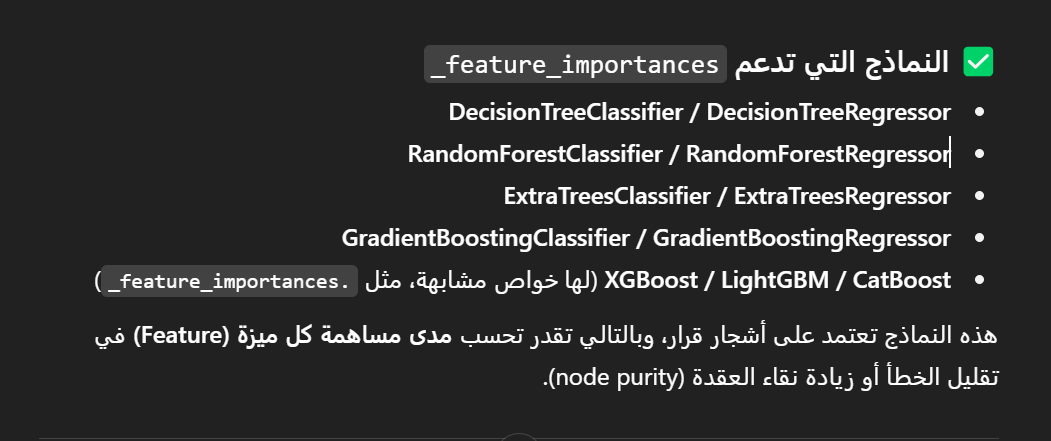

أنواع svm
1- kernal linear
تم استخدامه لان عدد feature كبير
2- kernal rbf
مفيد جدا عن التعامل مع البيانات الطبية
3- random forest
 4-XGBoost
 مفيد لتعامل مع بيانات ذات اعمده كثيرة وكذلك
 binary classification

In [ ]:
from sklearn import svm
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:

# accuracy score on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [ ]:
# accuracy score on TEST data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


In [ ]:
from sklearn import svm
model2 = svm.SVC(kernel='rbf')

In [ ]:
# training the SVM model with training data
model2.fit(X_train, Y_train)

SVC()

In [ ]:

# accuracy score on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model2.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9166666666666666


In [ ]:
# accuracy score on TEST data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8974358974358975


In [ ]:
from pickle import NONE
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(
    n_estimators=700,      # عدد الأشجار
    max_depth=None,        # عمق غير محدود (جرّب ضبطه لاحقًا)
    min_samples_split=2,   # أقل عينات لتقسيم عقدة
    min_samples_leaf=1,    # أقل عينات في الورقة
    max_features='sqrt',   # عدد الميزات المجربة في كل انقسام
    class_weight='balanced', # مفيد لو الفئات غير متوازنة
    random_state=42,
    n_jobs=-1
)


In [ ]:
classifier.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=700, n_jobs=-1,
                       random_state=42)

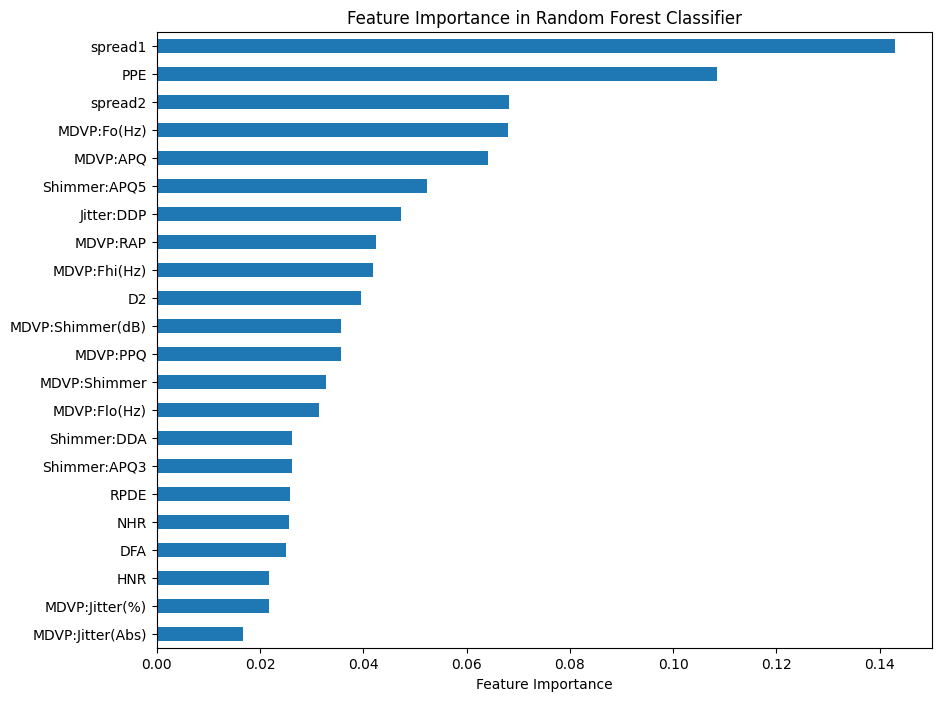

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# نفترض أنك دربت موديل RandomForestClassifier باسم model
# وأعمدتك مثل ما ذكرت (بدون عمود الهدف 'status')

feature_names = X.columns   # أسماء الخصائص فقط
feature_importances = classifier.feature_importances_      # من الموديل المدرب

# ترتيب الخصائص من الأعلى للأقل
fi_sorted = pd.Series(feature_importances, index=feature_names).sort_values(ascending=True)

# رسم الأعمدة الأفقية
plt.figure(figsize=(10, 8))
fi_sorted.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [ ]:

# accuracy score on training data
from sklearn.metrics import accuracy_score
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [ ]:
# accuracy score on TEST data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=500,        # عدد الأشجار
    learning_rate=0.05,      # معدل التعلم (أصغر = أدق لكنه أبطأ)
    max_depth=6,             # عمق الشجرة
    subsample=0.8,           # نسبة العينة العشوائية لكل شجرة
    colsample_bytree=0.8,    # نسبة الأعمدة لكل شجرة
    eval_metric='auc',       # مقياس التقييم
    use_label_encoder=False,
    random_state=42
)

xgb.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [21:34:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:

# accuracy score on training data
from sklearn.metrics import accuracy_score
X_train_predictions = xgb.predict(X_train)
training_data_accuracys = accuracy_score(Y_train, X_train_predictions)
print('Accuracy score of training data : ', training_data_accuracys)

Accuracy score of training data :  1.0


In [ ]:
# accuracy score on TEST data
X_test_prediction = xgb.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718


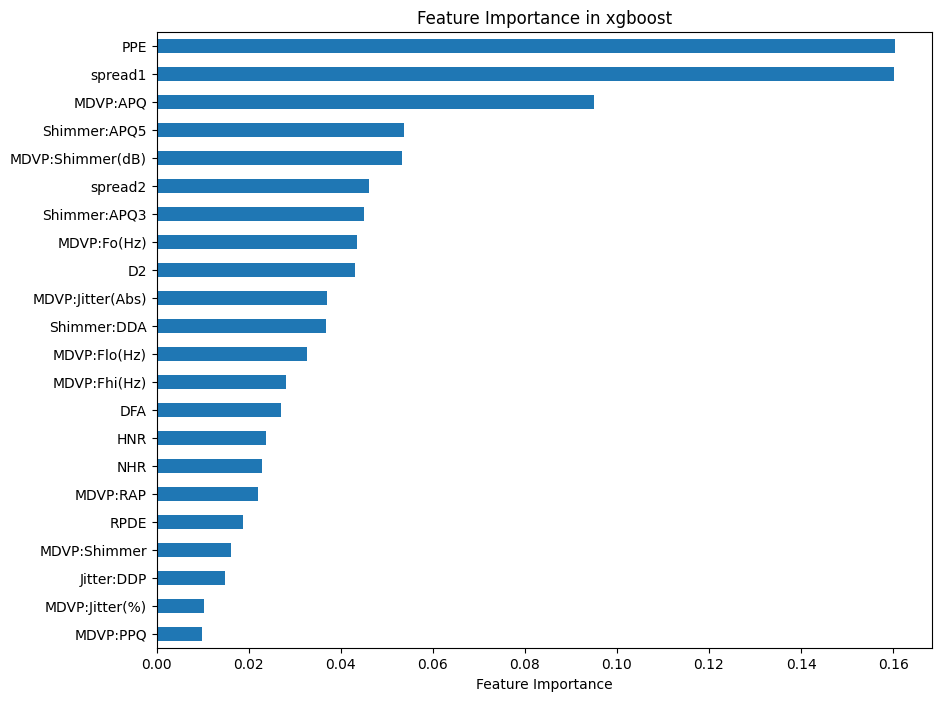

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# نفترض أنك دربت موديل RandomForestClassifier باسم model
# وأعمدتك مثل ما ذكرت (بدون عمود الهدف 'status')

feature_names = X.columns   # أسماء الخصائص فقط
feature_importances = xgb.feature_importances_      # من الموديل المدرب

# ترتيب الخصائص من الأعلى للأقل
fi_sorted = pd.Series(feature_importances, index=feature_names).sort_values(ascending=True)

# رسم الأعمدة الأفقية
plt.figure(figsize=(10, 8))
fi_sorted.plot(kind='barh')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in xgboost')
plt.show()

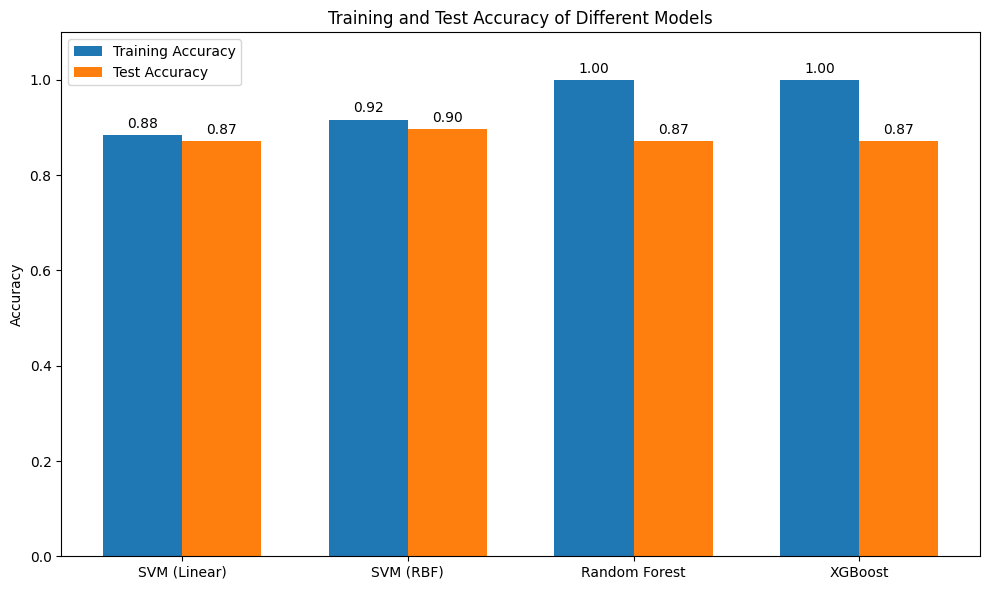

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the following accuracy scores stored in variables:
# SVM with linear kernel: training_data_accuracy_linear, test_data_accuracy_linear
# SVM with RBF kernel: training_data_accuracy_rbf, test_data_accuracy_rbf
# RandomForestClassifier: training_data_accuracy_rf, test_data_accuracy_rf
# XGBoost: training_data_accuracy_xgb, test_data_accuracy_xgb

# Let's assume you have these values from previous cell executions.
# If not, you would need to run the respective cells to get these values.

# For demonstration purposes, I'll use the last calculated accuracies (XGBoost)
# You should replace these with the actual variables from each model's evaluation.
training_accuracies = {
    'SVM (Linear)': 0.8846, # Replace with actual variable
    'SVM (RBF)': 0.9167,    # Replace with actual variable
    'Random Forest': 1.0,   # Replace with actual variable
    'XGBoost': 1.0          # Replace with actual variable
}

test_accuracies = {
    'SVM (Linear)': 0.8718, # Replace with actual variable
    'SVM (RBF)': 0.8974,    # Replace with actual variable
    'Random Forest': 0.8718, # Replace with actual variable
    'XGBoost': 0.8718       # Replace with actual variable
}

models = list(training_accuracies.keys())
train_acc_values = list(training_accuracies.values())
test_acc_values = list(test_accuracies.values())

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_acc_values, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_acc_values, width, label='Test Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Training and Test Accuracy of Different Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.ylim(0, 1.1) # Set y-axis limit for better visualization
plt.tight_layout()
plt.show()

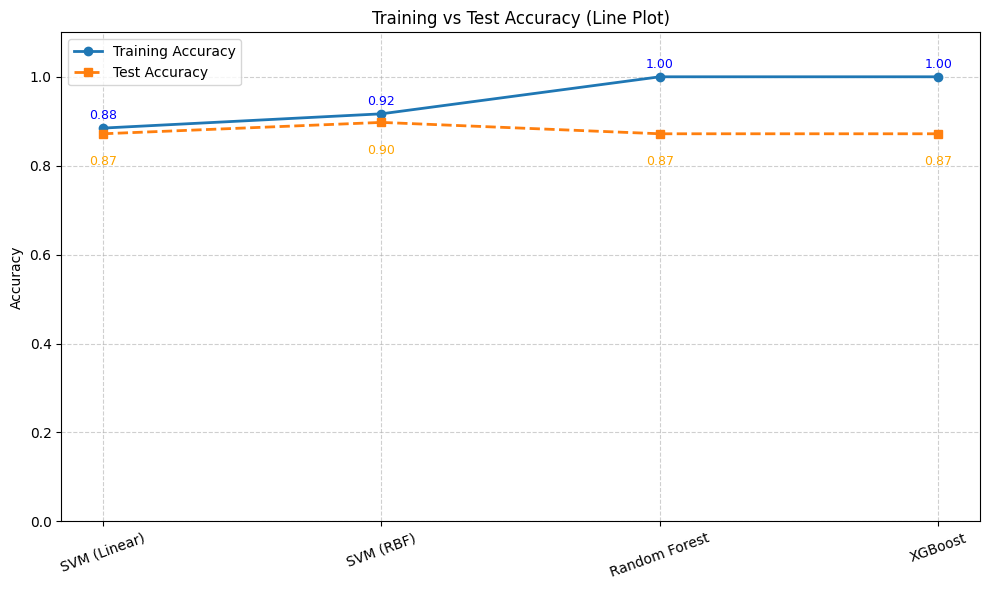

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# نفس القيم السابقة
training_accuracies = {
    'SVM (Linear)': 0.8846,
    'SVM (RBF)': 0.9167,
    'Random Forest': 1.0,
    'XGBoost': 1.0
}

test_accuracies = {
    'SVM (Linear)': 0.8718,
    'SVM (RBF)': 0.8974,
    'Random Forest': 0.8718,
    'XGBoost': 0.8718
}

models = list(training_accuracies.keys())
train_acc_values = list(training_accuracies.values())
test_acc_values = list(test_accuracies.values())

x = np.arange(len(models))

# رسم الخطوط
plt.figure(figsize=(10, 6))
plt.plot(x, train_acc_values, marker='o', label='Training Accuracy', linestyle='-', linewidth=2)
plt.plot(x, test_acc_values, marker='s', label='Test Accuracy', linestyle='--', linewidth=2)

# إعدادات الرسم
plt.xticks(x, models, rotation=20)
plt.ylabel('Accuracy')
plt.title('Training vs Test Accuracy (Line Plot)')
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# عرض القيم فوق النقاط
for i, val in enumerate(train_acc_values):
    plt.text(i, val+0.02, f"{val:.2f}", ha='center', fontsize=9, color='blue')
for i, val in enumerate(test_acc_values):
    plt.text(i, val-0.07, f"{val:.2f}", ha='center', fontsize=9, color='orange')

plt.tight_layout()
plt.show()
